# Cat Dog Chicken Baby


This code is based on code from a fast.ai MOOC that will be publicly available in Jan 2019.

Any code here is free to use however please ensure you credit Fast.Ai.
All corrections, modifications and collaborations are welcome.

This notebook is built on the first Fast.Ai lesson and is hopefully able to tell the difference between Cats, Dogs, Chickens and Babies.

Lets begin,

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Quick check to make sure we have a functioning CUDA to train with.

CPU training options are provided by the fastai library but are painfully slow.

In [3]:
# move me!
torch.cuda.is_available()

True

This notebook is based off the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai import *
from fastai.vision import *

Refer to the Image Downloader notebook to obtain images.

This notebook assumes that your images are in folders by class in the data folder which should be in the same directory as this notebook. 

To use different file/folder structures check the docs for `ImageDataBunch`, there are plenty of options.

The first step it to load up our images and obtain a list of classes from the filenames. This is done using folder names and `ImageDataBunch.from_folder`

Lets load in our images.

In [12]:
path = Path('data/cdcb')

If you get CUDA out of memory errors try reducing the batchsize (bs) to 32 then 16, ensure you `Kernal -> Restart` before retrying.

Ok, lets load some images!

In [9]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4, bs=64)
data.normalize(imagenet_stats)
data.classes

['cats', 'dogs', 'chickens', 'babies']

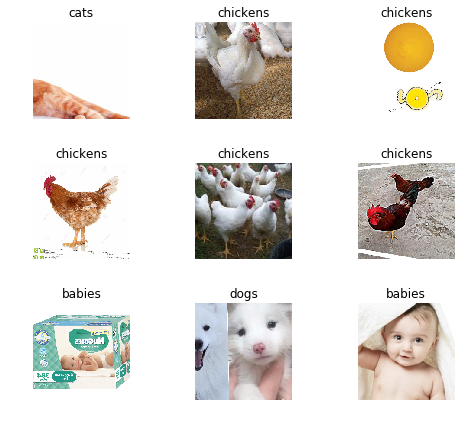

In [10]:
data.show_batch(rows=3, figsize=(7,6))

# Training

We will begin by creating a leaner from our data batches and train for 4 epochs

In [13]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

Total time: 01:18
epoch  train_loss  valid_loss  error_rate
1      0.912640    0.166925    0.059210    (00:21)
2      0.486685    0.095108    0.019737    (00:18)
3      0.317191    0.084380    0.019737    (00:18)
4      0.228329    0.085490    0.019737    (00:19)



In [15]:
learn.save('stage-1')

# Initial results

A quick confusion matrix to see how we did (at the time of writing I'm not in a position actually run any training so i'm just assuming/hoping we have decent accuracy at this point).

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

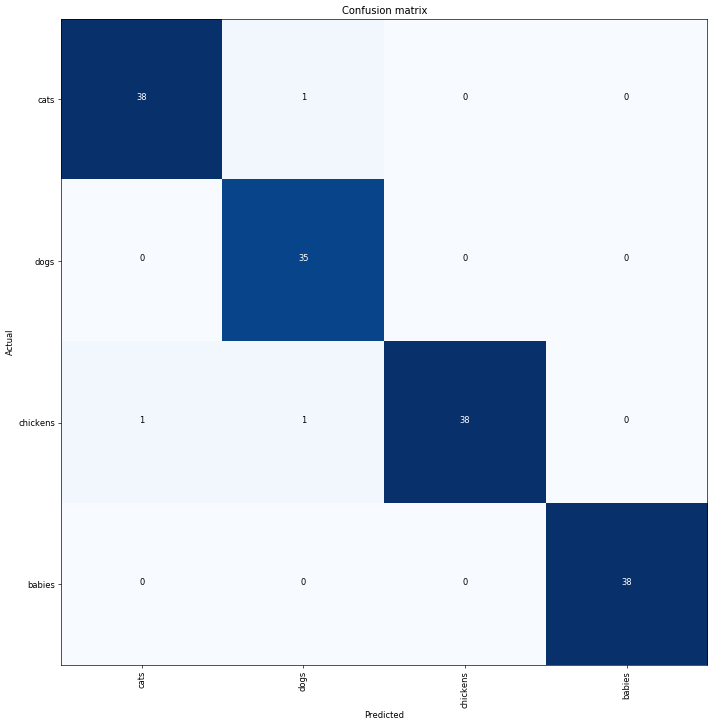

In [17]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Unfreezing, fine-tuning, and learning rates

Now we go ahead and unfreeze the last few layers of our model to better fit it to our training data.

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

# Putting the notebook into production

In [ ]:
data.classes

In [ ]:
# fastai.defaults.device = torch.device('cpu')

In [ ]:
img = open_image(path/'black'/'00000021.jpg')
img

In [ ]:
classes = ['black', 'grizzly', 'teddys']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Stay tuned for better/more interesting models including web based deployment and layer visualisations.